In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
# generate random embedding matrix
np.random.seed(42)
embedding = np.random.rand(78,16)
#78 rows and 16 cols

print(embedding[0])

[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
 0.05808361 0.86617615 0.60111501 0.70807258 0.02058449 0.96990985
 0.83244264 0.21233911 0.18182497 0.18340451]


In [ ]:
scaler = StandardScaler()
embedding = scaler.fit_transform(embedding)

# pca
pca = PCA(n_components = 2)
embedding_pca = pca.fit_transform(embedding)

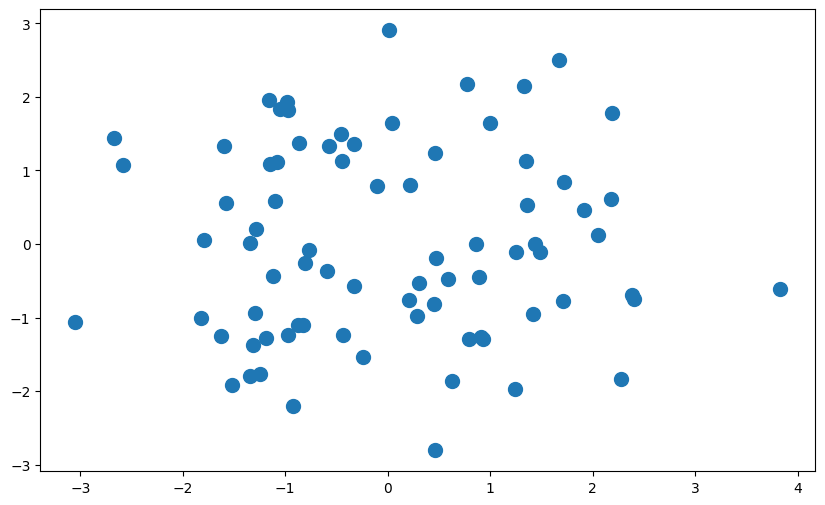

In [ ]:

# plot
plt.figure(figsize=(10, 6))
plt.scatter(embedding_pca[:, 0], embedding_pca[:, 1], s=100)

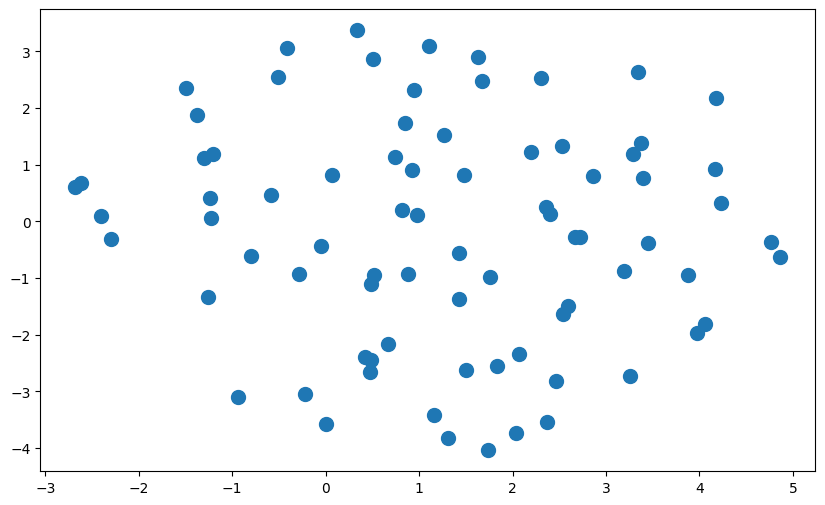

In [ ]:
from sklearn.manifold import TSNE

# generate random embedding matrix
np.random.seed(42)
embedding = np.random.rand(78,16)

# tsne
tsne = TSNE(n_components=2,random_state=42)
embedding_tsne = tsne.fit_transform(embedding)

# plot
plt.figure(figsize=(10, 6))
plt.scatter(embedding_tsne[:, 0], embedding_tsne[:, 1], s=100)

In [ ]:
# matrix factorization
import networkx as nx
import pandas as pd
from karateclub import HOPE
import warnings
warnings.filterwarnings("ignore")

G = nx.karate_club_graph()

# run hope embedding
hope = HOPE(dimensions=16)
hope.fit(G)
embedding = hope.get_embedding()
print(pd.DataFrame(embedding))

          0         1         2         3         4         5         6   \
0  -4.403994 -2.062438  0.239590  1.187595 -2.472114 -2.221249  5.991613   
1   2.618469 -3.942422  0.595727  1.593282  1.900262 -0.824668  6.049644   
2   0.061278  2.518074  0.046821 -5.319092  1.851315  0.449735  4.971901   
3   1.107660 -0.303289  0.830964 -0.038798  1.297998  0.048338  4.493652   
4   1.677061  0.619467 -0.465828 -0.266722 -2.806195  0.414674  1.504556   
5   1.854364  0.619750 -1.321089 -0.246214 -5.456506  0.375778  1.960412   
6   0.410282  0.324036 -1.247925 -0.195525 -5.208602  0.332189  1.919001   
7  -0.671151  1.231363  0.707828  1.145376  1.446341  0.434412  4.065770   
8   1.162531 -1.222265 -2.010247  3.221519  0.891158  2.224748 -0.601150   
9  -0.133358  0.101931 -0.379793  1.295822  0.262859  0.696167 -0.424689   
10 -0.229054  0.046722 -0.623446 -0.075770 -3.081327  0.155204  1.308179   
11  1.694167  0.709907  0.091796 -0.322730 -0.768595  0.499348  1.050772   
12  0.138618

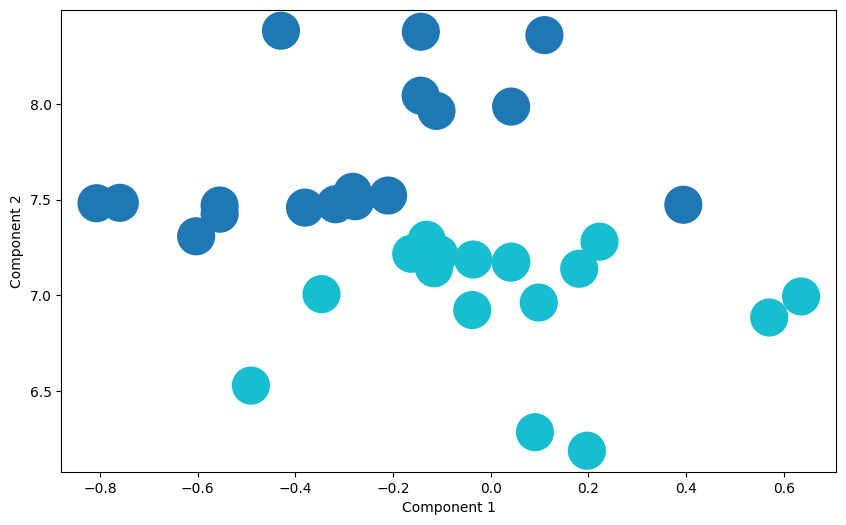

In [ ]:

df = pd.DataFrame(embedding)

# run tsne
tsne = TSNE(n_components=2,random_state=42)
tsne_obj = tsne.fit_transform(df)
# node labels
labels = np.asarray([G.nodes[i]['club'] != 'Mr. Hi' for i in G.nodes]).astype(np.int64)
# plot tsne
plt.figure(figsize=(10, 6))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.scatter(tsne_obj[:, 0], tsne_obj[:, 1], c=labels, cmap='tab10', s=700)